In [2]:
### 泰坦尼克号预测
import numpy as np
import pandas as pd

In [83]:
#导入数据集
data = pd.read_csv('../data/Taitanic_data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [86]:
data['Ticket'].value_counts()

CA. 2343      7
1601          7
347082        7
3101295       6
CA 2144       6
             ..
11755         1
A/5 3902      1
C.A. 34260    1
113503        1
36865         1
Name: Ticket, Length: 681, dtype: int64

In [87]:
data.drop(['PassengerId','Name','Cabin','Ticket'],inplace=True,axis=1) 

In [88]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [89]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [90]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [91]:
data = data.dropna()

In [92]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [93]:
#将二分类变量转换为数值型变量
from sklearn.preprocessing import LabelEncoder
data.loc[:,'Sex'] = LabelEncoder().fit_transform(data.loc[:,'Sex'])

In [94]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [95]:
data.loc[:,'Embarked'] = LabelEncoder().fit_transform(data.loc[:,'Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [96]:
#提取特征矩阵和标签矩阵
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [97]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [98]:
from sklearn.preprocessing import StandardScaler

In [103]:
data.head()
data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1,1))
# data.loc[:, 'Fare'] = StandardScaler().fit_transform(data.loc[:, 'Fare'])

In [105]:
data.head()
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1,1))

In [106]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.590495,1,0,-0.500240,2
1,1,1,0,0.643971,1,0,0.788947,0
2,1,3,0,-0.281878,0,0,-0.486650,2
3,1,1,0,0.412509,1,0,0.422861,2
4,0,3,1,0.412509,0,0,-0.484133,2


In [114]:
#导入数据集
dataT = pd.read_csv('../data/Taitanic_data/data.csv')
dataT.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
dataT["Age"] = dataT["Age"].fillna(dataT["Age"].mean())
dataT.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
dataT.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
dataT.loc[:,['Age','Fare']] = StandardScaler().fit_transform(dataT.loc[:,['Age', 'Fare']])
dataT.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,-0.486337,NaN,S


In [122]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2)

In [123]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
455,3,1,29.0,0,0,7.8958,0
508,3,1,28.0,0,0,22.5250,2
393,1,0,23.0,1,0,113.2750,0
116,3,1,70.5,0,0,7.7500,1
471,3,1,38.0,0,0,8.6625,2


In [124]:
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [30]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,47.0,0,0,34.0208,2
1,1,0,60.0,1,0,75.2500,0
2,3,1,3.0,4,2,31.3875,2
3,2,1,19.0,0,0,10.5000,2
4,1,0,22.0,1,0,66.6000,2


In [125]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [126]:
#带入模型粗跑一下
ada = AdaBoostClassifier(random_state=25)
ada = ada.fit(Xtrain, Ytrain)
score_ada = ada.score(Xtest, Ytest)
score_ada

0.8089887640449438

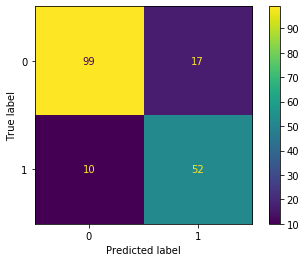

In [33]:
from sklearn import metrics
 
metrics.plot_confusion_matrix(ada, Xtest, Ytest)

In [127]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

0.8812165775401071


<Figure size 432x288 with 0 Axes>

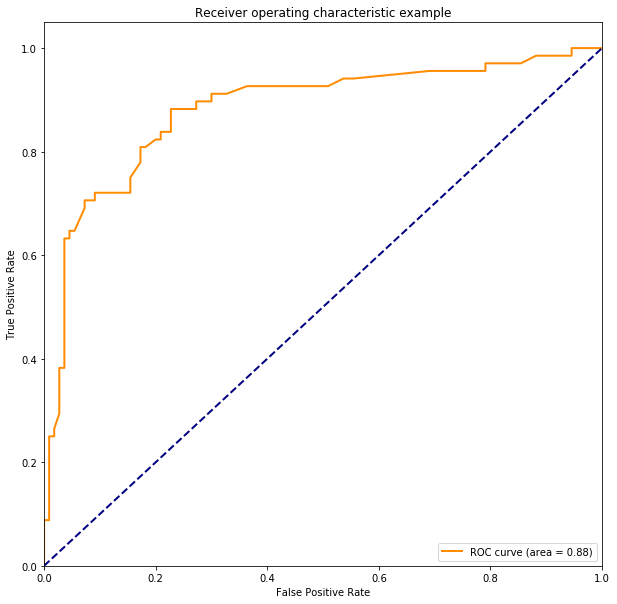

In [132]:
y_score = ada.fit(Xtrain, Ytrain).decision_function(Xtest)
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(Ytest, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [131]:
y_score = ada.fit(Xtrain, Ytrain).decision_function(Xtest)
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
y_pred = ada.predict(Xtest)
score = accuracy_score(Ytest, y_pred)
print(score)
print(ada.score(Xtest, Ytest))

0.848314606741573
0.848314606741573


In [133]:
#交叉验证
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada, Xtrain, Ytrain, cv=5)
print(f'这个模型的准确率为{round(scores.mean() * 100,3)}% (+/- {round(scores.std()*2 *100,3)}%)')

这个模型的准确率为80.165% (+/- 4.626%)


In [134]:
#随机森林
rfc = RandomForestClassifier(random_state=25)
rfc = rfc.fit(Xtrain, Ytrain)
score_rfc = cross_val_score(rfc, Xtrain, Ytrain, cv=5)

#梯度提升
gbc = GradientBoostingClassifier(random_state=25)
gbc = gbc.fit(Xtrain, Ytrain)
score_gbc = cross_val_score(gbc, Xtrain, Ytrain, cv=5)

#AdaBoost与随机森林结合
model = AdaBoostClassifier(RandomForestClassifier(n_estimators = 1000),
                           algorithm="SAMME",
                           n_estimators=500)
model = model.fit(Xtrain, Ytrain)
score_AdaRfc = cross_val_score(model, Xtrain, Ytrain, cv=5)

In [135]:
score = {
    'model':['rfc', 'gbc', 'adaAndrfc'],
    'score':[score_rfc.mean(), score_gbc.mean(), score_AdaRfc.mean()]
}
score = pd.DataFrame(score)
print(score)

       model     score
0        rfc  0.810046
1        gbc  0.810115
2  adaAndrfc  0.807269
